In [59]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
file_path = 'data_cleaned/merged_workout_metrics.csv'
workouts = pd.read_csv(file_path)

In [61]:
exercises = pd.read_csv('data_cleaned/processed_exercises_v2.csv')

/var/folders/3f/hpgbw8dd459305qvgctxmywc0000gn/T/ipykernel_78172/1378313259.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  exercises = pd.read_csv('data_cleaned/processed_exercises_v2.csv')


In [62]:
workouts.head()

,CloudId,Date,WorkoutId,total_workout_duration,total_calories_burnt,total_cardio_calories,total_cardio_duration,total_isotonic_calories,total_isotonic_duration,duration_core,duration_lower_body,duration_total_body,duration_upper_body,duration_cardiovascular,duration_flexibility_mobility,duration_free_weights,duration_functional_training,duration_strength_training,Gender,Age
0,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-01-15,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,3437,485.0,180.0,740,305.0,2697,306,608,740,1783,740,0,1314,0,1383,M,56
1,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-01-31,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,4202,562.0,280.0,1680,282.0,2522,306,1456,900,1540,1680,0,1314,0,1208,M,56
2,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-02,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,3986,537.0,255.0,1500,282.0,2486,306,1235,900,1545,1500,0,1314,0,1172,M,56
3,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-05,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,3863,497.0,215.0,1325,282.0,2538,306,1281,725,1551,1325,0,1314,0,1224,M,56
4,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-07,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,4374,569.0,287.0,1440,282.0,2934,306,1008,1440,1620,1440,0,1314,0,1620,M,56


In [63]:
# Transform the 'Gender' column into two separate columns
workouts = pd.get_dummies(workouts, columns=['Gender'])

# Display the first few rows to verify the transformation
workouts.head()

,CloudId,Date,WorkoutId,total_workout_duration,total_calories_burnt,total_cardio_calories,total_cardio_duration,total_isotonic_calories,total_isotonic_duration,duration_core,...,duration_total_body,duration_upper_body,duration_cardiovascular,duration_flexibility_mobility,duration_free_weights,duration_functional_training,duration_strength_training,Age,Gender_F,Gender_M
0,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-01-15,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,3437,485.0,180.0,740,305.0,2697,306,...,740,1783,740,0,1314,0,1383,56,False,True
1,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-01-31,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,4202,562.0,280.0,1680,282.0,2522,306,...,900,1540,1680,0,1314,0,1208,56,False,True
2,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-02,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,3986,537.0,255.0,1500,282.0,2486,306,...,900,1545,1500,0,1314,0,1172,56,False,True
3,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-05,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,3863,497.0,215.0,1325,282.0,2538,306,...,725,1551,1325,0,1314,0,1224,56,False,True
4,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-07,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,4374,569.0,287.0,1440,282.0,2934,306,...,1440,1620,1440,0,1314,0,1620,56,False,True


After that, we have two options:
- Cluster workouts as they are and create broader categories
- Perform further aggregations and then cluster the users directly

In [64]:
workouts.shape

(439696, 21)

### Option 1

In [65]:
workouts['Gender_M'] = workouts['Gender_M'].astype(int)
workouts['Gender_F'] = workouts['Gender_F'].astype(int)

# Display the first few rows to verify the transformation
workouts.head()

,CloudId,Date,WorkoutId,total_workout_duration,total_calories_burnt,total_cardio_calories,total_cardio_duration,total_isotonic_calories,total_isotonic_duration,duration_core,...,duration_total_body,duration_upper_body,duration_cardiovascular,duration_flexibility_mobility,duration_free_weights,duration_functional_training,duration_strength_training,Age,Gender_F,Gender_M
0,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-01-15,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,3437,485.0,180.0,740,305.0,2697,306,...,740,1783,740,0,1314,0,1383,56,0,1
1,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-01-31,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,4202,562.0,280.0,1680,282.0,2522,306,...,900,1540,1680,0,1314,0,1208,56,0,1
2,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-02,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,3986,537.0,255.0,1500,282.0,2486,306,...,900,1545,1500,0,1314,0,1172,56,0,1
3,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-05,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,3863,497.0,215.0,1325,282.0,2538,306,...,725,1551,1325,0,1314,0,1224,56,0,1
4,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-07,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,4374,569.0,287.0,1440,282.0,2934,306,...,1440,1620,1440,0,1314,0,1620,56,0,1


In [66]:
# List of duration columns to be transformed
duration_columns = [
    'total_workout_duration', 'total_cardio_duration', 'total_isotonic_duration',
    'duration_core', 'duration_lower_body', 'duration_total_body', 'duration_upper_body',
    'duration_cardiovascular', 'duration_flexibility_mobility', 'duration_free_weights',
    'duration_functional_training', 'duration_strength_training'
]

# Transform the duration columns from seconds to minutes
workouts[duration_columns] = workouts[duration_columns] / 60

# Display the first few rows to verify the transformation
workouts.head()

,CloudId,Date,WorkoutId,total_workout_duration,total_calories_burnt,total_cardio_calories,total_cardio_duration,total_isotonic_calories,total_isotonic_duration,duration_core,...,duration_total_body,duration_upper_body,duration_cardiovascular,duration_flexibility_mobility,duration_free_weights,duration_functional_training,duration_strength_training,Age,Gender_F,Gender_M
0,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-01-15,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,57.283333,485.0,180.0,12.333333,305.0,44.950000,5.1,...,12.333333,29.716667,12.333333,0.0,21.9,0.0,23.050000,56,0,1
1,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-01-31,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,70.033333,562.0,280.0,28.000000,282.0,42.033333,5.1,...,15.000000,25.666667,28.000000,0.0,21.9,0.0,20.133333,56,0,1
2,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-02,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,66.433333,537.0,255.0,25.000000,282.0,41.433333,5.1,...,15.000000,25.750000,25.000000,0.0,21.9,0.0,19.533333,56,0,1
3,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-05,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,64.383333,497.0,215.0,22.083333,282.0,42.300000,5.1,...,12.083333,25.850000,22.083333,0.0,21.9,0.0,20.400000,56,0,1
4,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-07,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,72.900000,569.0,287.0,24.000000,282.0,48.900000,5.1,...,24.000000,27.000000,24.000000,0.0,21.9,0.0,27.000000,56,0,1


#### How many workouts that have a duration more than 4 hours?

In [69]:
# Filter workouts with duration more than 4 hours (240 minutes)
long_workouts = workouts[workouts['total_workout_duration'] > 240]

# Count the number of such workouts
num_long_workouts = long_workouts.shape[0]
print(f"Number of workouts with duration more than 4 hours: {num_long_workouts}")

# Count the number of distinct users who performed these workouts
num_distinct_users = long_workouts['CloudId'].nunique()
print(f"Number of distinct users who performed workouts with duration more than 4 hours: {num_distinct_users}")

Number of workouts with duration more than 4 hours: 1202
Number of distinct users who performed workouts with duration more than 4 hours: 130


In [74]:
# Define numerical features
numerical_features = [col for col in workouts.columns if workouts[col].dtype in ['int64', 'float64']]

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical feature
Q1 = workouts[numerical_features].quantile(0.05)
Q3 = workouts[numerical_features].quantile(0.95)
IQR = Q3 - Q1

# Define a mask to filter out outliers
mask = ~((workouts[numerical_features] < (Q1 - 1.5 * IQR)) | (workouts[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to the DataFrame
workouts_cleaned = workouts[mask]

# Display the first few rows of the cleaned DataFrame
workouts_cleaned.head()

,CloudId,Date,WorkoutId,total_workout_duration,total_calories_burnt,total_cardio_calories,total_cardio_duration,total_isotonic_calories,total_isotonic_duration,duration_core,...,duration_total_body,duration_upper_body,duration_cardiovascular,duration_flexibility_mobility,duration_free_weights,duration_functional_training,duration_strength_training,Age,Gender_F,Gender_M
0,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-01-15,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,57.283333,485.0,180.0,12.333333,305.0,44.950000,5.1,...,12.333333,29.716667,12.333333,0.0,21.9,0.0,23.050000,56,0,1
1,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-01-31,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,70.033333,562.0,280.0,28.000000,282.0,42.033333,5.1,...,15.000000,25.666667,28.000000,0.0,21.9,0.0,20.133333,56,0,1
2,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-02,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,66.433333,537.0,255.0,25.000000,282.0,41.433333,5.1,...,15.000000,25.750000,25.000000,0.0,21.9,0.0,19.533333,56,0,1
3,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-05,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,64.383333,497.0,215.0,22.083333,282.0,42.300000,5.1,...,12.083333,25.850000,22.083333,0.0,21.9,0.0,20.400000,56,0,1
4,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-07,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,72.900000,569.0,287.0,24.000000,282.0,48.900000,5.1,...,24.000000,27.000000,24.000000,0.0,21.9,0.0,27.000000,56,0,1


In [75]:
workouts_cleaned.shape

(424073, 21)

In [76]:
from sklearn.cluster import KMeans


# Select the columns for clustering
features = ['total_workout_duration', 'total_calories_burnt', 'total_cardio_calories',
            'total_cardio_duration', 'total_isotonic_calories', 'total_isotonic_duration',
            'duration_core', 'duration_lower_body', 'duration_total_body', 'duration_upper_body',
            'duration_cardiovascular', 'duration_flexibility_mobility', 'duration_free_weights',
            'duration_functional_training', 'duration_strength_training', 'Gender_F', 'Gender_M', 'Age']

X = workouts[features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=42)
workouts['Cluster'] = kmeans.fit_predict(X)

# Display the first few rows with the cluster assignments
workouts.head()

,CloudId,Date,WorkoutId,total_workout_duration,total_calories_burnt,total_cardio_calories,total_cardio_duration,total_isotonic_calories,total_isotonic_duration,duration_core,...,duration_upper_body,duration_cardiovascular,duration_flexibility_mobility,duration_free_weights,duration_functional_training,duration_strength_training,Age,Gender_F,Gender_M,Cluster
0,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-01-15,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,57.283333,485.0,180.0,12.333333,305.0,44.950000,5.1,...,29.716667,12.333333,0.0,21.9,0.0,23.050000,56,0,1,1
1,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-01-31,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,70.033333,562.0,280.0,28.000000,282.0,42.033333,5.1,...,25.666667,28.000000,0.0,21.9,0.0,20.133333,56,0,1,1
2,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-02,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,66.433333,537.0,255.0,25.000000,282.0,41.433333,5.1,...,25.750000,25.000000,0.0,21.9,0.0,19.533333,56,0,1,1
3,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-05,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,64.383333,497.0,215.0,22.083333,282.0,42.300000,5.1,...,25.850000,22.083333,0.0,21.9,0.0,20.400000,56,0,1,1
4,0015d65e3205deb6bb6a8f0d57cc48547918f0f2,2022-02-07,0015d65e3205deb6bb6a8f0d57cc48547918f0f22022-0...,72.900000,569.0,287.0,24.000000,282.0,48.900000,5.1,...,27.000000,24.000000,0.0,21.9,0.0,27.000000,56,0,1,1


In [77]:
# Group by 'Cluster' and calculate the mean for each group, keeping only numerical features
cluster_means = workouts.groupby('Cluster')[numerical_features].mean()

# Add the count of records in each cluster
cluster_counts = workouts['Cluster'].value_counts().sort_index()
cluster_means['Count'] = cluster_counts

# Display the average column values for each cluster along with the count
cluster_means

,total_workout_duration,total_calories_burnt,total_cardio_calories,total_cardio_duration,total_isotonic_calories,total_isotonic_duration,duration_core,duration_lower_body,duration_total_body,duration_upper_body,duration_cardiovascular,duration_flexibility_mobility,duration_free_weights,duration_functional_training,duration_strength_training,Age,Gender_F,Gender_M,Count
Cluster,,,,,,,,,,,,,,,,,,,
0,27.777604,144.446835,65.108732,11.265501,79.338103,16.512103,2.371605,10.717957,6.146752,8.541290,10.480880,0.331345,3.042838,2.728114,11.194428,53.417515,0.511110,0.488890,208280
1,77.324121,461.078113,123.847168,15.593944,337.230944,61.730176,10.888802,25.965748,11.320889,29.148681,15.573401,1.395358,10.865941,14.521570,34.967850,51.474121,0.294870,0.705130,61885
2,78.957819,687.041512,562.695447,57.481345,124.346064,21.476474,4.622303,31.064499,33.188644,10.082373,56.075426,0.428337,2.463538,3.967659,16.022860,52.854281,0.201344,0.798656,48072
3,481.053498,3141.605802,125.689420,14.631911,3015.916382,466.421587,208.016837,51.956797,112.875171,108.204693,15.779863,31.922725,6.181598,374.525028,52.644283,47.383959,0.634812,0.365188,586
4,134.297120,1341.584459,1126.532484,99.896258,215.051975,34.400862,8.157625,53.883902,54.869047,17.386547,96.281299,0.944702,4.834950,6.705466,25.530705,52.159398,0.136884,0.863116,7773
5,50.141565,350.072364,267.391448,34.965000,82.680916,15.176565,2.959485,20.673908,19.308303,7.199869,33.776231,0.301221,1.486146,2.281387,12.296580,53.590929,0.381210,0.618790,113061
6,1875.523077,10517.076923,851.307692,39.747863,9665.769231,1835.775214,10.003846,546.706838,91.281197,1227.531197,39.619658,669.487179,4.800000,941.976068,219.640171,41.230769,0.000000,1.000000,39


In [78]:
average_age = exercises['Age'].mean()
print(f"The average age in the data is {average_age:.2f} years.")

The average age in the data is 54.28 years.


#### Plot cluster genders

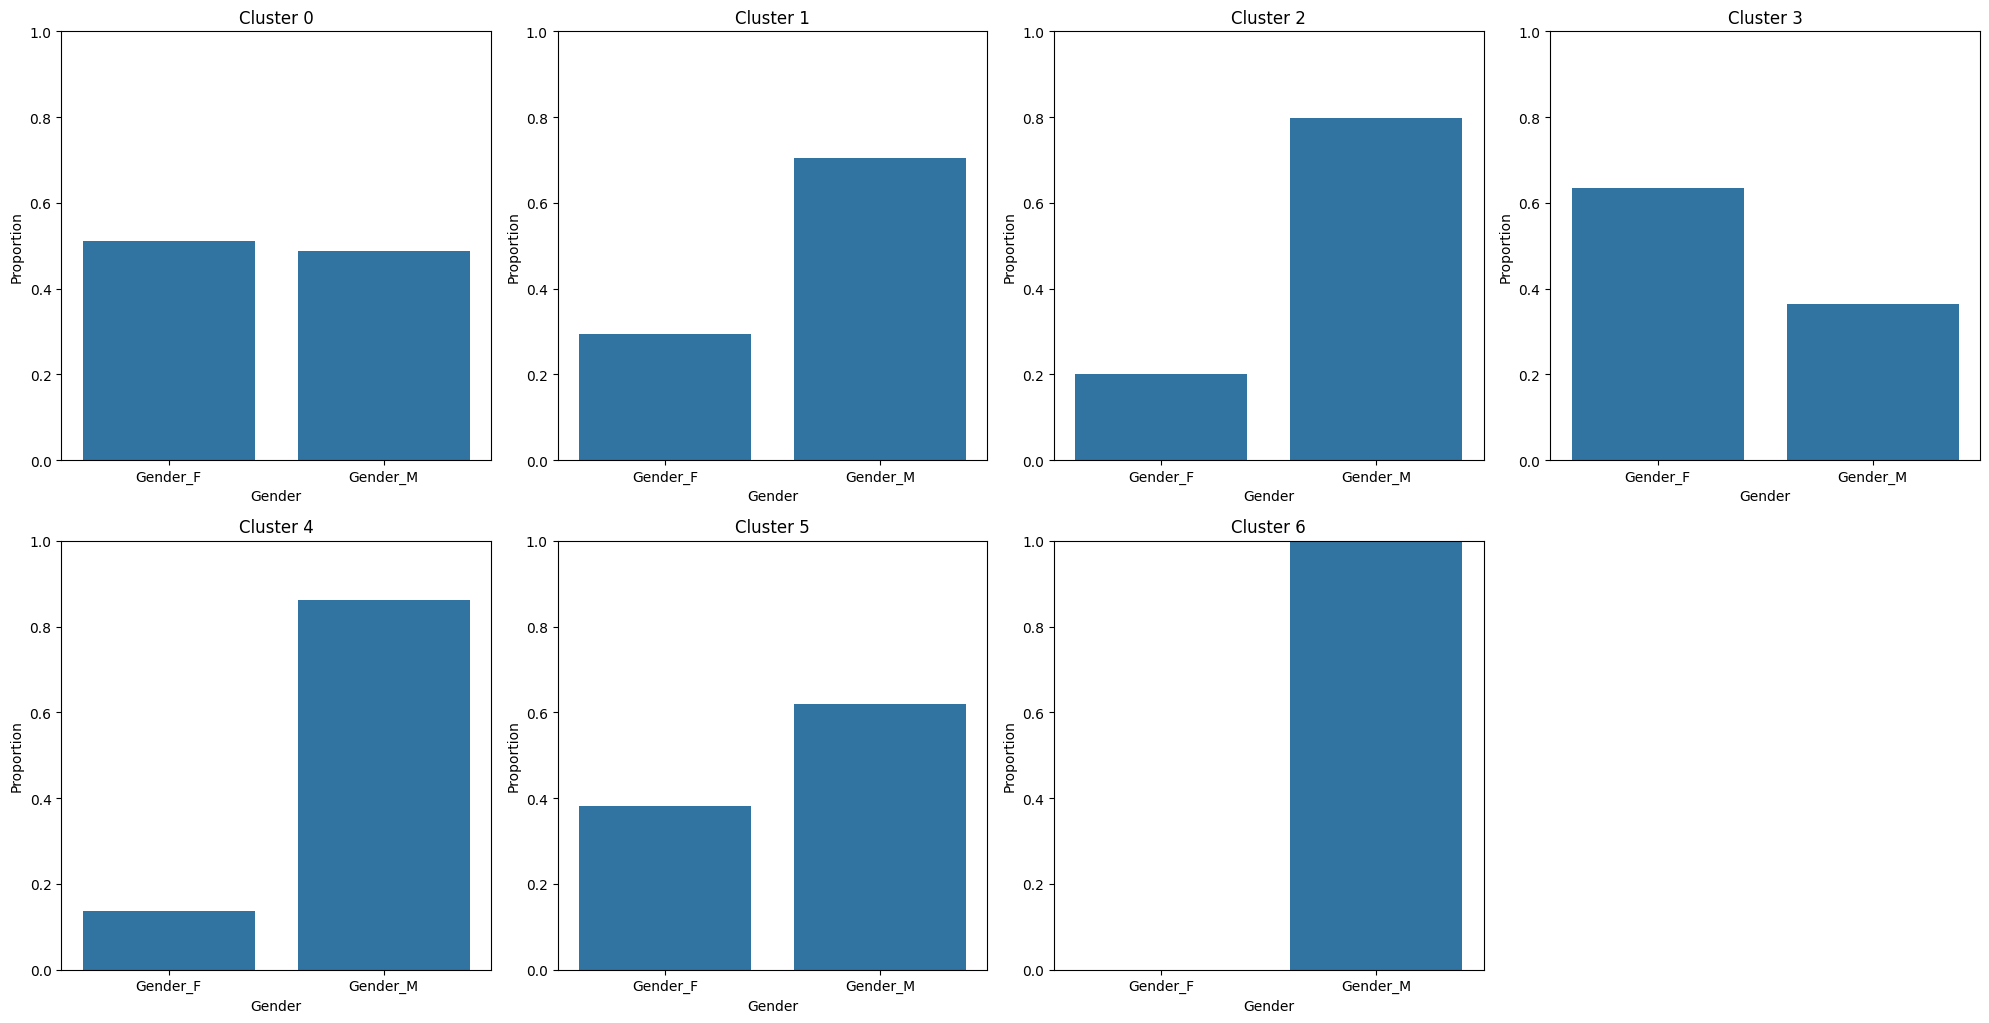

In [79]:
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 15))

# Loop through each cluster and plot the categorical variables
for cluster in cluster_means.index:
    plt.subplot(3, 4, cluster + 1)
    sns.barplot(x=['Gender_F', 'Gender_M'], y=cluster_means.loc[cluster, ['Gender_F', 'Gender_M']])
    plt.title(f'Cluster {cluster}')
    plt.ylim(0, 1)
    plt.ylabel('Proportion')
    plt.xlabel('Gender')

plt.tight_layout()
plt.show()

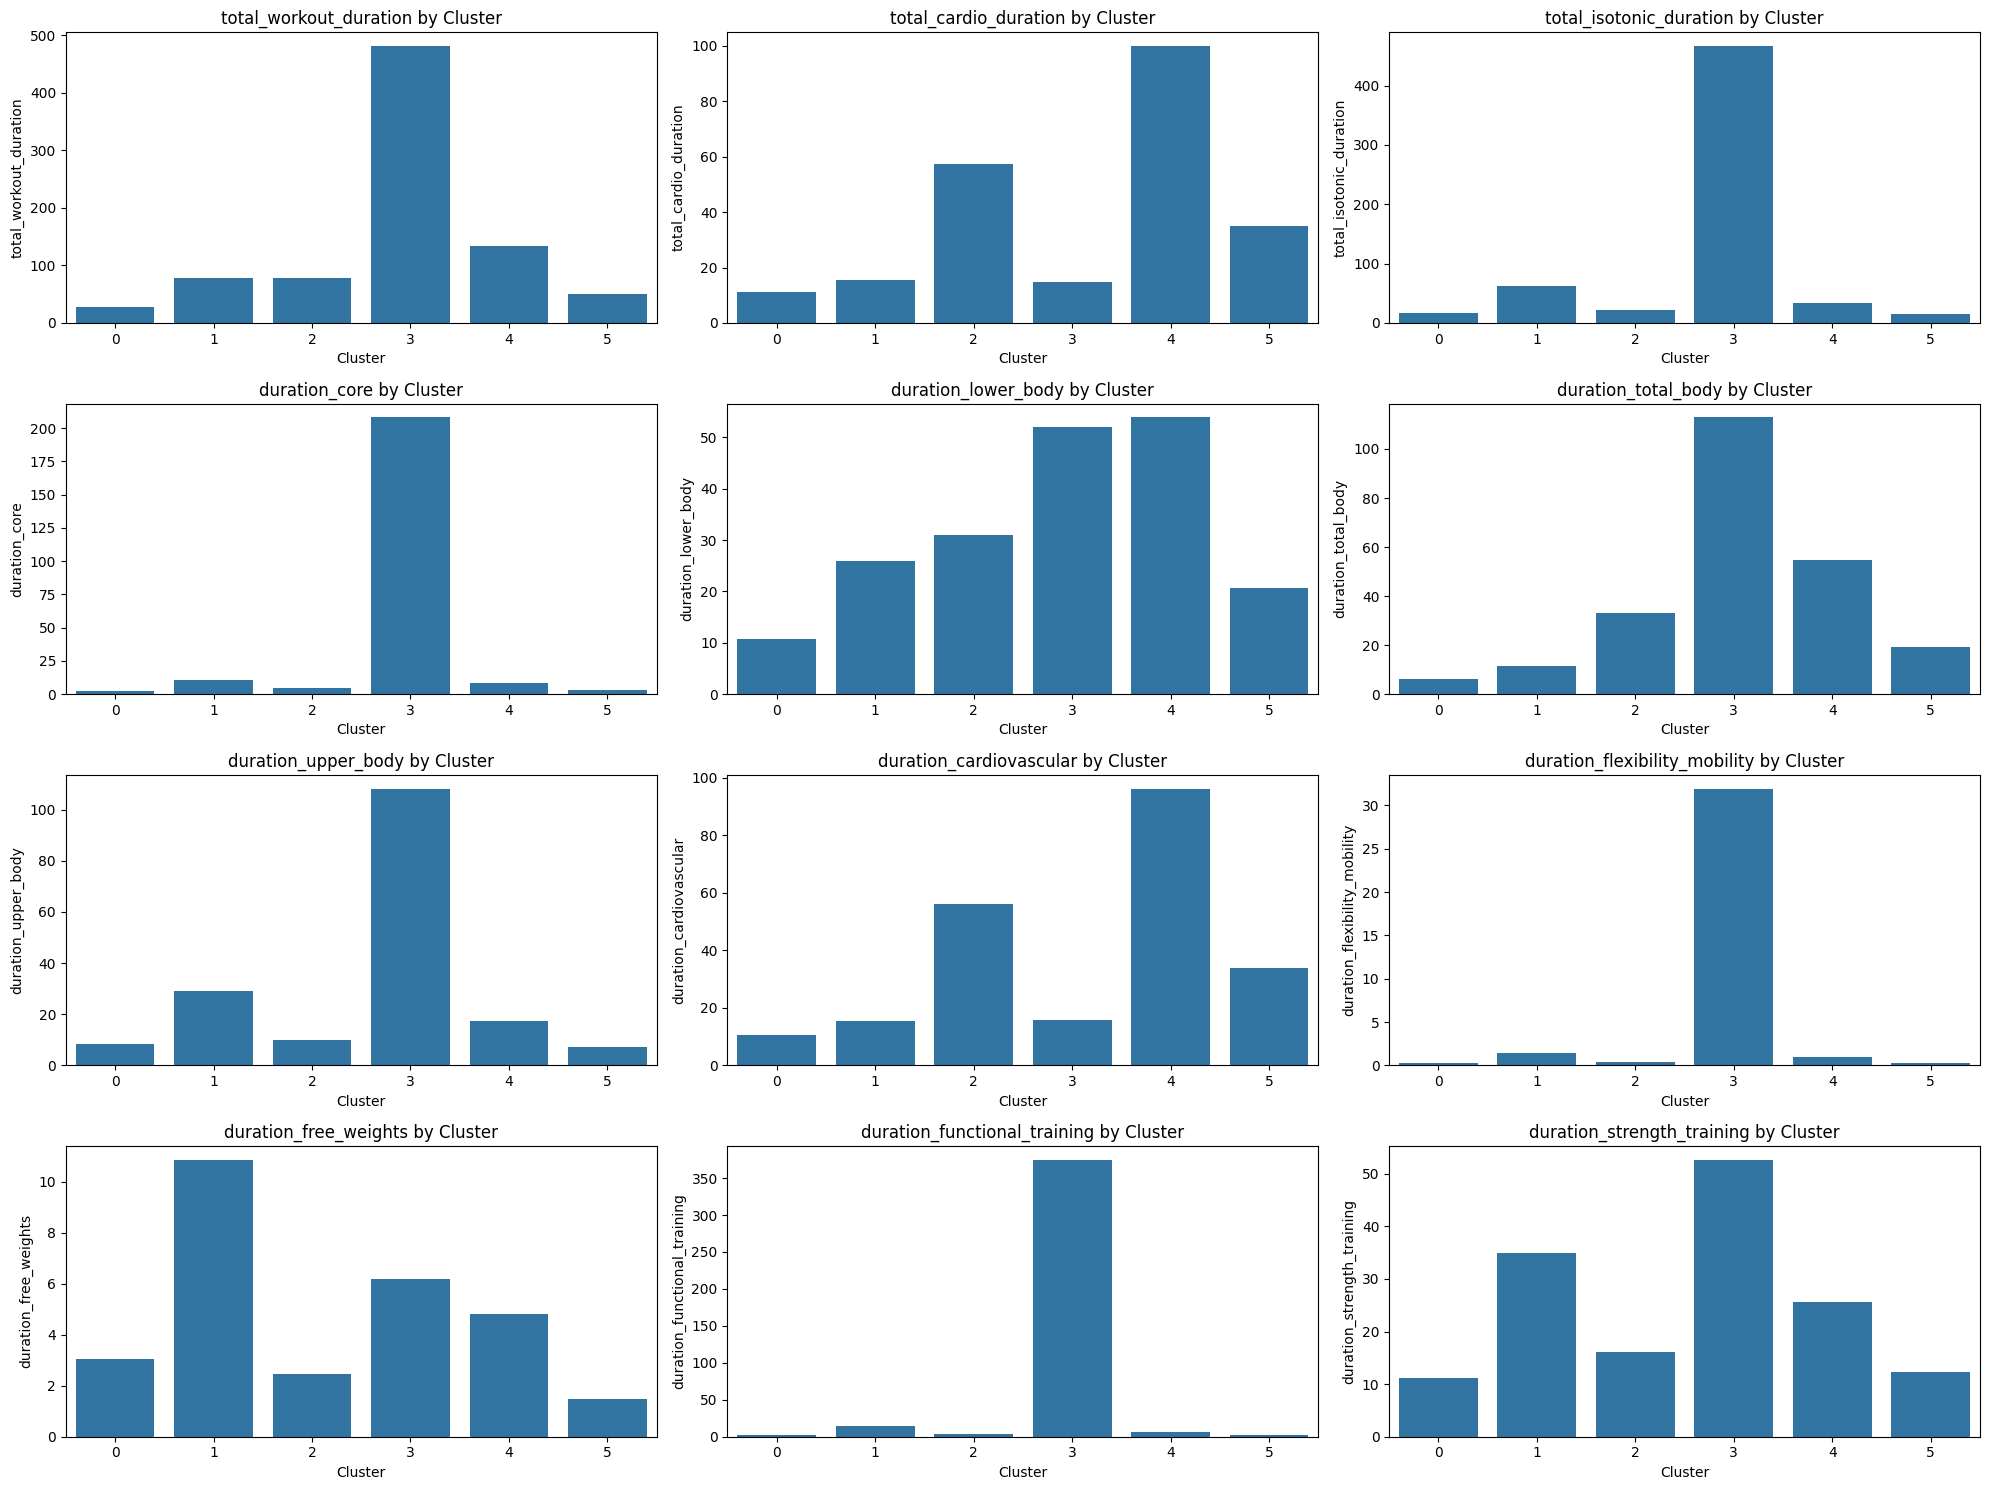

In [81]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Exclude cluster 6
filtered_cluster_means = cluster_means.drop(index=6)

# Loop through each duration column and plot the values for each cluster
for i, column in enumerate(duration_columns):
    plt.subplot(4, 3, i + 1)
    sns.barplot(x=filtered_cluster_means.index, y=filtered_cluster_means[column])
    plt.title(f'{column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

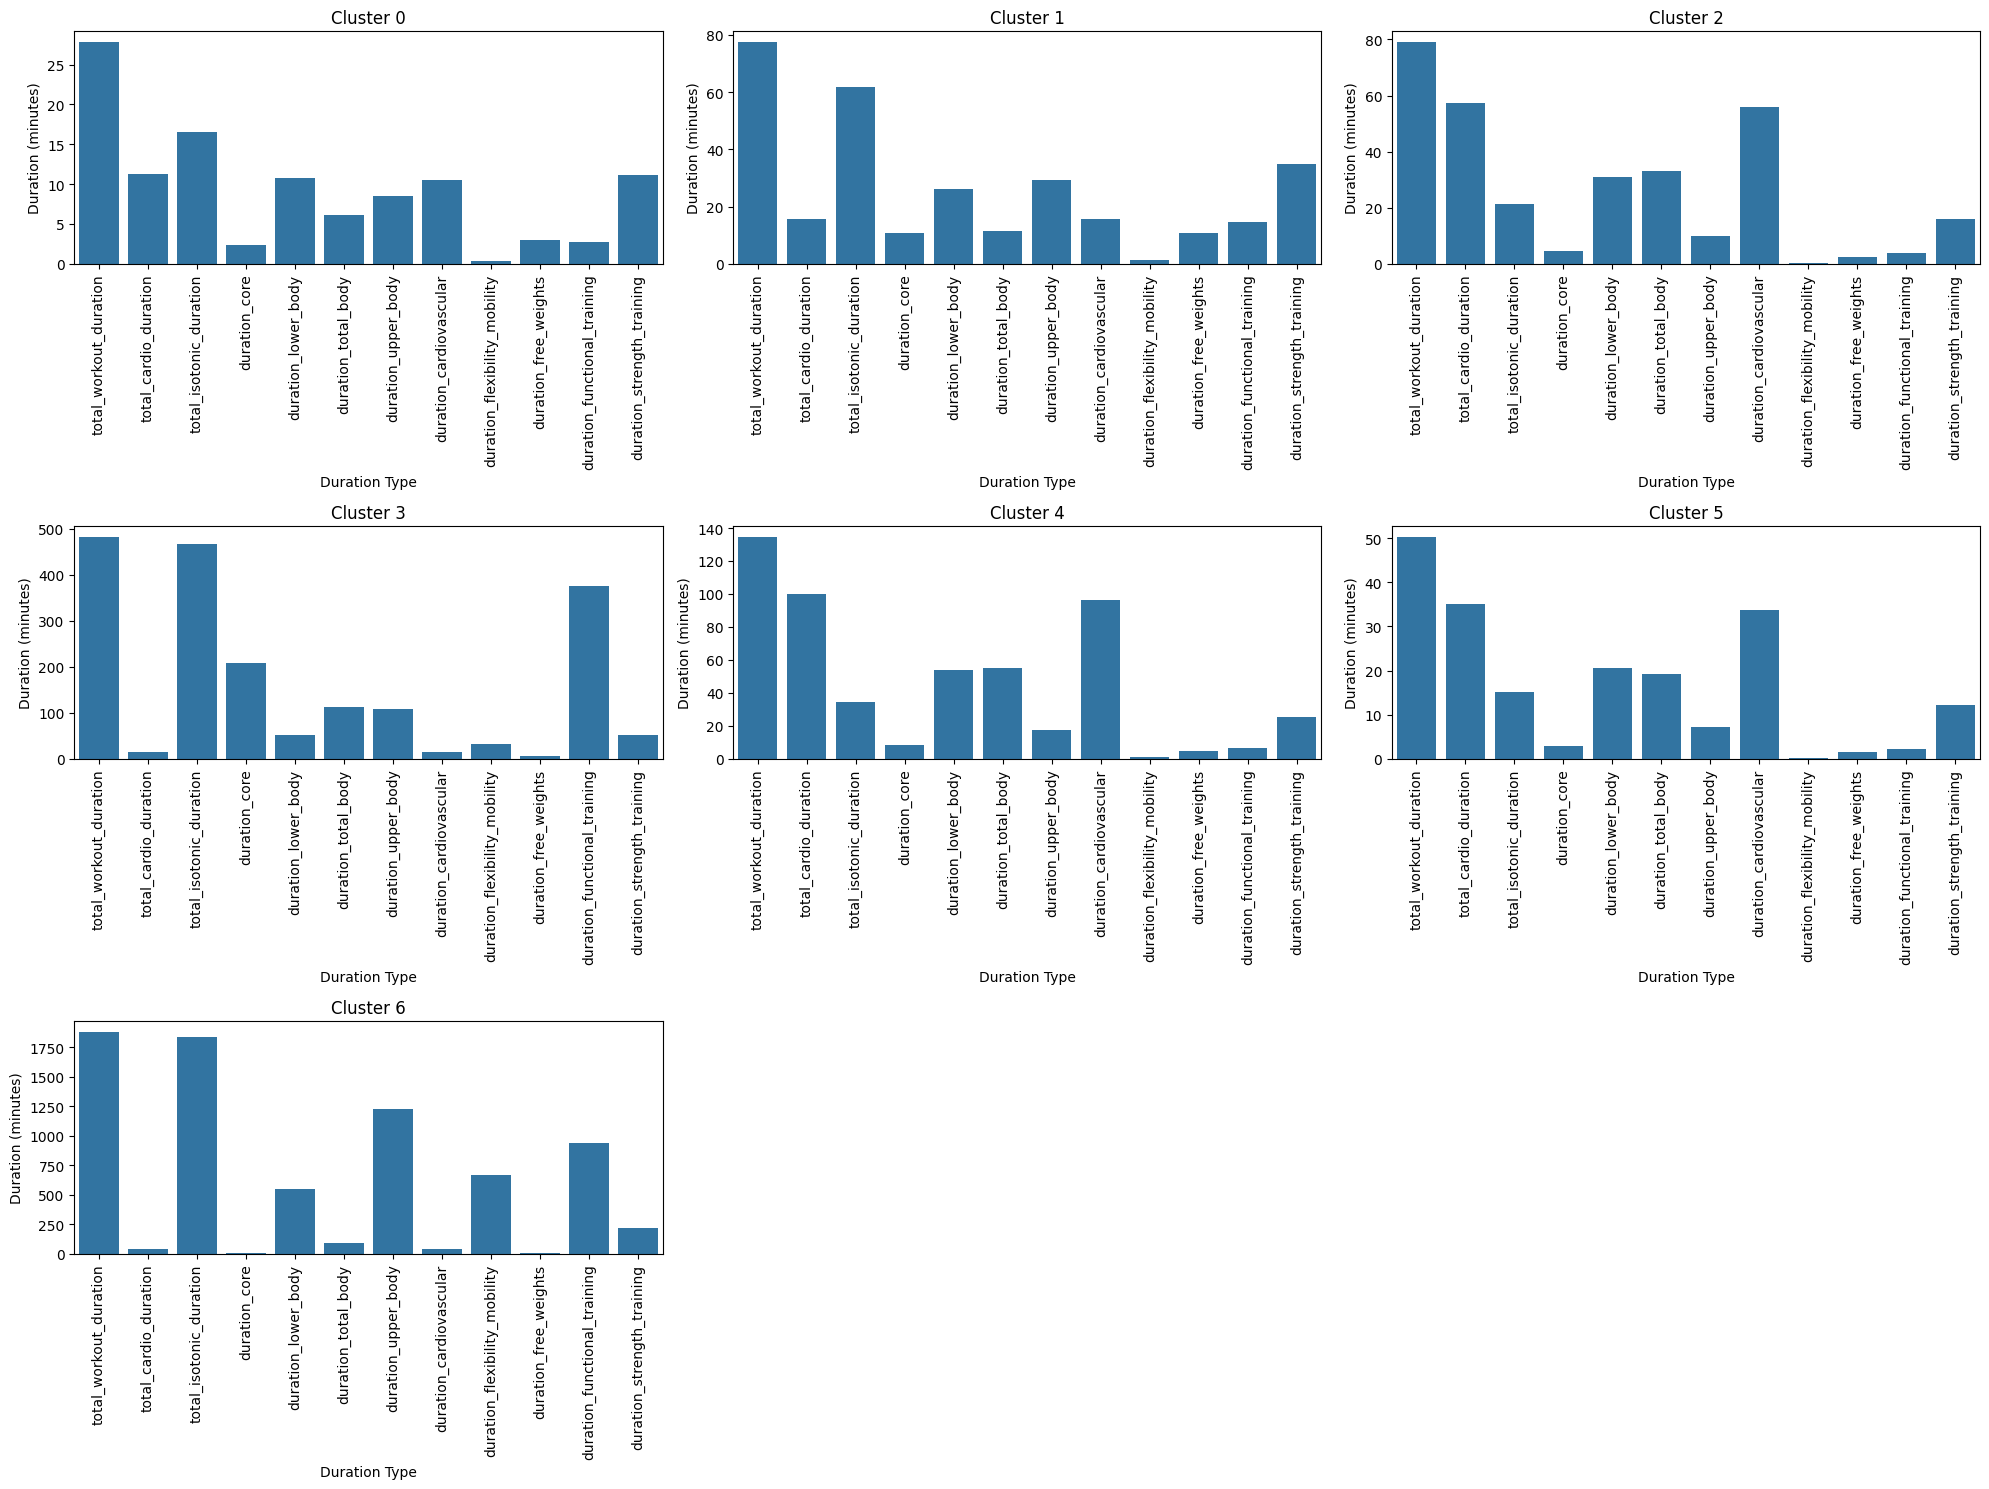

In [82]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Loop through each cluster and plot the duration columns
for cluster in cluster_means.index:
    plt.subplot(3, 3, cluster + 1)
    sns.barplot(x=duration_columns, y=cluster_means.loc[cluster, duration_columns])
    plt.title(f'Cluster {cluster}')
    plt.xticks(rotation=90)
    plt.ylabel('Duration (minutes)')
    plt.xlabel('Duration Type')

plt.tight_layout()
plt.show()

In [12]:
workouts[workouts['Cluster'] == 5]

,CloudId,Date,WorkoutId,total_workout_duration,total_calories_burnt,total_cardio_calories,total_cardio_duration,total_isotonic_calories,total_isotonic_duration,duration_core,...,duration_upper_body,duration_cardiovascular,duration_flexibility_mobility,duration_free_weights,duration_functional_training,duration_strength_training,Age,Gender_F,Gender_M,Cluster
181962,6a46112f33f00278aaa027116c33d2862b893dde,2022-11-20,6a46112f33f00278aaa027116c33d2862b893dde2022-1...,485.433333,12143.0,984.0,56.116667,11159.0,429.316667,14.983333,...,26.166667,56.116667,0.0,0.0,0.000000,429.316667,50,0,1,5
201756,756aa254324cab7e423dcbdef5d7404bedd7eb8e,2022-06-08,756aa254324cab7e423dcbdef5d7404bedd7eb8e2022-0...,1581.950000,8008.0,364.0,23.683333,7644.0,1558.266667,8.266667,...,1015.000000,23.683333,555.0,0.0,845.000000,158.266667,42,0,1,5
201759,756aa254324cab7e423dcbdef5d7404bedd7eb8e,2022-06-13,756aa254324cab7e423dcbdef5d7404bedd7eb8e2022-0...,1624.116667,9160.0,398.0,26.033333,8762.0,1598.083333,0.000000,...,1081.000000,26.033333,565.0,0.0,867.000000,166.083333,42,0,1,5
201760,756aa254324cab7e423dcbdef5d7404bedd7eb8e,2022-06-15,756aa254324cab7e423dcbdef5d7404bedd7eb8e2022-0...,2588.016667,14646.0,325.0,20.016667,14321.0,2568.000000,126.000000,...,1666.000000,20.016667,546.0,0.0,1540.000000,482.000000,42,0,1,5
201762,756aa254324cab7e423dcbdef5d7404bedd7eb8e,2022-06-20,756aa254324cab7e423dcbdef5d7404bedd7eb8e2022-0...,1358.533333,7654.0,350.0,24.733333,7304.0,1333.800000,6.500000,...,857.000000,24.733333,581.0,0.0,584.000000,168.800000,42,0,1,5
201766,756aa254324cab7e423dcbdef5d7404bedd7eb8e,2022-06-25,756aa254324cab7e423dcbdef5d7404bedd7eb8e2022-0...,1059.516667,7556.0,303.0,20.700000,7253.0,1038.816667,6.816667,...,912.000000,20.700000,0.0,0.0,0.000000,1038.816667,42,0,1,5
201767,756aa254324cab7e423dcbdef5d7404bedd7eb8e,2022-06-27,756aa254324cab7e423dcbdef5d7404bedd7eb8e2022-0...,2322.333333,8889.0,393.0,25.333333,8496.0,2297.000000,0.000000,...,1765.000000,25.333333,1197.0,0.0,1100.000000,0.000000,42,0,1,5
201768,756aa254324cab7e423dcbdef5d7404bedd7eb8e,2022-06-28,756aa254324cab7e423dcbdef5d7404bedd7eb8e2022-0...,409.816667,7444.0,306.0,21.816667,7138.0,388.000000,0.000000,...,268.000000,21.816667,0.0,0.0,0.000000,388.000000,42,0,1,5
201770,756aa254324cab7e423dcbdef5d7404bedd7eb8e,2022-07-04,756aa254324cab7e423dcbdef5d7404bedd7eb8e2022-0...,2747.283333,12496.0,452.0,30.533333,12044.0,2716.750000,0.000000,...,2038.750000,30.533333,1589.0,0.0,962.000000,165.750000,42,0,1,5
201772,756aa254324cab7e423dcbdef5d7404bedd7eb8e,2022-07-12,756aa254324cab7e423dcbdef5d7404bedd7eb8e2022-0...,1408.916667,8684.0,0.0,0.000000,8684.0,1408.916667,0.000000,...,916.916667,0.000000,497.0,0.0,668.000000,243.916667,42,0,1,5


In [13]:
exercises = pd.read_csv('data_cleaned/processed_exercises_v2.csv')

/var/folders/3f/hpgbw8dd459305qvgctxmywc0000gn/T/ipykernel_78172/1378313259.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  exercises = pd.read_csv('data_cleaned/processed_exercises_v2.csv')


In [16]:
a = exercises.groupby(['CloudId', 'Date']).sum().sort_values('Duration_sec', ascending=False)

In [45]:
a[a['Duration_sec'] > 5*60*60].reset_index()['CloudId'].nunique()

70

Remove users whose duration exceeds the 5 hours per day

(array([4.3799e+05, 4.0000e+01, 9.0000e+00, 8.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([6.000000e+01, 5.137680e+04, 1.026936e+05, 1.540104e+05,
        2.053272e+05, 2.566440e+05, 3.079608e+05, 3.592776e+05,
        4.105944e+05, 4.619112e+05, 5.132280e+05]),
 <BarContainer object of 10 artists>)

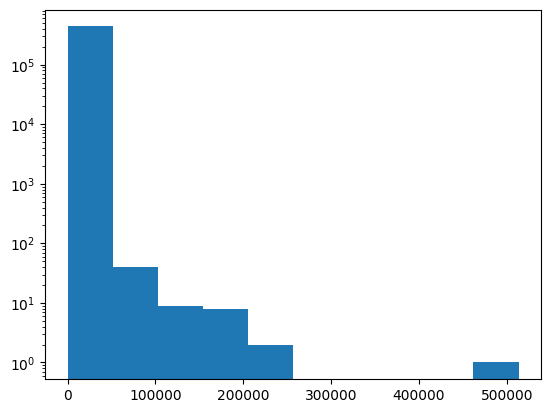

In [25]:
plt.hist(a['Duration_sec'], bins=10, log=True)